In [1]:
import yfinance as yf
import pandas as pd

In [2]:
tesla=yf.Ticker('TSLA') #retriving the telsa data

In [4]:
tesla_data=tesla.history(period='10y') #getting the data from last 10 years

In [7]:
tesla_data.reset_index().head() #reseting index and show first 5 row of the data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-03-03 00:00:00-05:00,15.817333,16.776667,15.666000,16.704000,196339500,0.0,0.0
1,2014-03-04 00:00:00-05:00,17.232000,17.333332,16.855333,16.989332,131184000,0.0,0.0
2,2014-03-05 00:00:00-05:00,17.114668,17.132668,16.786667,16.844000,89035500,0.0,0.0
3,2014-03-06 00:00:00-05:00,16.942667,17.166668,16.629999,16.862667,110416500,0.0,0.0
4,2014-03-07 00:00:00-05:00,16.862667,16.990000,16.294001,16.414000,117184500,0.0,0.0


In [8]:
from bs4 import BeautifulSoup
import requests

In [35]:
# using requests library to download the webpage
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
# Save the text of the response
html_text = requests.get(url).text
# Parse the html data using beautiful_soup.
soup=BeautifulSoup(html_text, 'html5lib')

In [106]:
tesla_revenue=pd.DataFrame(columns=['Date','Revenue'])
for row in soup.find_all('table',attrs={'class':'historical_data_table table'})[1].tbody.find_all('tr'):
    col=row.find_all('td')
    date=col[0].text
    revenue=col[1].text
    new_row=pd.Series({'Date':date,'Revenue':revenue})
    tesla_revenue.loc[len(tesla_revenue)]=new_row

In [138]:
tesla_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [133]:
tesla_revenue.iloc[1]['Revenue'].replace('$',"")

'2194'

In [134]:
tesla_revenue['Revenue']=tesla_revenue['Revenue'].str.replace('$',"")

In [136]:
tesla_revenue['Revenue']=tesla_revenue['Revenue'].astype(int)

In [77]:
GameStop=yf.Ticker('GME') #retriving the GameStop data

In [79]:
GameStop_data=GameStop.history(period='10y') #getting the data from last 10 years

In [80]:
GameStop_data.reset_index().head() #reseting index and show first 5 row of the data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-03-04 00:00:00-05:00,6.753671,6.813104,6.703244,6.726656,6133200,0.0,0.0
1,2014-03-05 00:00:00-05:00,6.795093,7.022017,6.753671,6.978793,15731200,0.0,0.0
2,2014-03-06 00:00:00-05:00,6.984196,7.085051,6.917560,6.967987,11832800,0.0,0.0
3,2014-03-07 00:00:00-05:00,7.022016,7.056234,6.919359,6.937369,8106400,0.0,0.0
4,2014-03-10 00:00:00-04:00,6.937372,7.020216,6.856327,6.935570,9502000,0.0,0.0


In [81]:
# using requests library to download the webpage
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
# Save the text of the response
html_text = requests.get(url).text
# Parse the html data using beautiful_soup.
soup=BeautifulSoup(html_text, 'html5lib')

In [91]:
Gamestop_revenue=pd.DataFrame(columns=['Date','Revenue'])
for row in soup.find_all('table',attrs={'class':'historical_data_table table'})[1].tbody.find_all('tr'):
    col=row.find_all('td')
    date=col[0].text
    revenue=col[1].text
    new_row=pd.Series({'Date':date,'Revenue':revenue})
    Gamestop_revenue.loc[len(Gamestop_revenue)]=new_row

In [98]:
Gamestop_revenue['Revenue']=Gamestop_revenue['Revenue'].str.replace(r'$|,', '', regex=True)

In [101]:
Gamestop_revenue['Revenue']=Gamestop_revenue['Revenue'].astype(int)

In [143]:
Gamestop_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [139]:
def make_graph(data,col1,col2):
    return data.plot(x=col1,y=col2)

<Axes: xlabel='Date'>

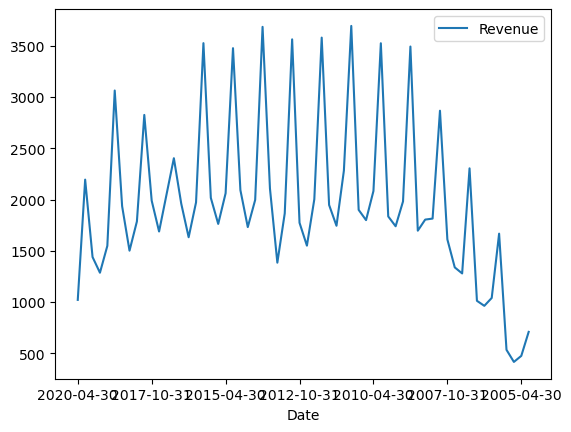

In [140]:
make_graph(tesla_revenue,'Date','Revenue')

<Axes: xlabel='Date'>

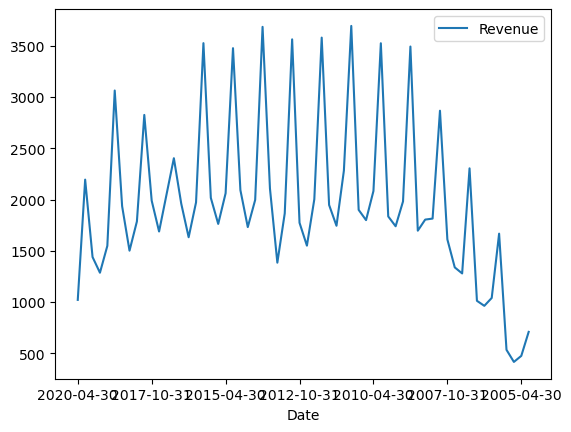

In [141]:
make_graph(Gamestop_revenue,'Date','Revenue')